In [20]:
# I am doing tSNE and Hierarchical clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap.umap_ as umap
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

df = pd.read_csv('titanic3.csv')
display(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


[ 1.  0. nan]


In [2]:
### Mason's preprocessing

df["ageNull"] = df["age"].isnull().astype(int)

numeric_cols = ["age","fare", "pclass", "sibsp", "parch"]

X_num = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

imputer = KNNImputer(
    n_neighbors=5,          
    weights="uniform"      
)

X_imputed = imputer.fit_transform(X_scaled)

X_filled = scaler.inverse_transform(X_imputed)
df_imputed = pd.DataFrame(X_filled, columns=numeric_cols, index=df.index)

df["AgeImputed"] = df_imputed["age"]
df.drop('age', axis=1, inplace=True)
df.drop('cabin', axis=1, inplace=True)
df.drop('body', axis=1, inplace=True)
df.drop('boat', axis=1, inplace=True)
df.drop('home.dest', axis=1, inplace=True)

df["Title"] = (
    df["name"]
    .str.extract(r",\s*([^\.]+)\.", expand=False)
    .str.strip()
)

df.drop('name', axis=1, inplace=True)



df["sex"] = df["sex"].map({"male": 1, "female": 0})


df = pd.get_dummies(df,
                    columns=["embarked"],
                    prefix="emb",
                    drop_first=True,
                    dtype=float)

df = pd.get_dummies(df,
                    columns=["Title"],
                    prefix="title",
                    drop_first=True,
                    dtype=float)

df["ticket_prefix"] = (
    df["ticket"]
      .str.extract(r"^([A-Za-z\.\/]+)", expand=False)   
      .str.replace(r"[\.\/]", "", regex=True)           
      .fillna("NONE")                                   
)

df["ticket_number"] = (
    df["ticket"]
      .str.extract(r"(\d+)$", expand=False)
      .astype(float)
      .fillna(0.0)
)


df = pd.get_dummies(df,
                    columns=["ticket_prefix"],
                    prefix="tkt",
                    drop_first=True,
                    dtype=float)

df.drop(columns=["ticket"], inplace=True)


df_clean = df.dropna().reset_index(drop=True)
df.drop(columns=["survived"], inplace=True)


X_scaled = scaler.fit_transform(df_clean)

display(df_clean)
# print(X_scaled)

,pclass,survived,sex,sibsp,parch,fare,ageNull,AgeImputed,emb_Q,emb_S,...,tkt_SOP,tkt_SOPP,tkt_SOTONO,tkt_SOTONOQ,tkt_SP,tkt_STONO,tkt_STONOQ,tkt_SWPP,tkt_WC,tkt_WEP
0,1.0,1.0,0.0,0.0,0.0,211.3375,0,29.0000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,2.0,151.5500,0,0.9167,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,2.0,151.5500,0,2.0000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,2.0,151.5500,0,30.0000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,2.0,151.5500,0,25.0000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3.0,0.0,0.0,1.0,0.0,14.4542,0,14.5000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304,3.0,0.0,0.0,1.0,0.0,14.4542,1,20.1000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,3.0,0.0,1.0,0.0,0.0,7.2250,0,26.5000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,3.0,0.0,1.0,0.0,0.0,7.2250,0,27.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# testing the scaling and preprocessing
print(np.amax(X_scaled))
print(np.amin(X_scaled))

36.152454965050445
-2.223221258871411


In [41]:
X = X_scaled
y = df_clean["survived"]
print(y.unique())
labels = y.map({0: "died", 1: "survived"})

[1. 0.]


In [42]:
# tSNE euclidean
tsne = TSNE(n_components=2, perplexity=30, metric='euclidean', angle=0.1)
X_tsne = tsne.fit_transform(X)

In [43]:
df_tsne = pd.DataFrame(X_tsne, columns=["Component 1", "Component 2"])
df_tsne["survived"] = labels
fig = px.scatter(df_tsne, x="Component 1", y="Component 2", color="survived", symbol="survived", symbol_sequence= ['star-diamond', 'hexagram'], title="tSNE", color_discrete_sequence = ['midnightblue', 'firebrick'])
fig.show()

In [44]:
# tSNE cosine
tsne = TSNE(n_components=2, perplexity=30, metric='cosine', angle=0.1)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=["Component 1", "Component 2"])
df_tsne["survived"] = labels
fig = px.scatter(df_tsne, x="Component 1", y="Component 2", color="survived", symbol="survived", symbol_sequence= ['star-diamond', 'hexagram'], title="tSNE", color_discrete_sequence = ['midnightblue', 'firebrick'])
fig.show()

In [49]:
linkage = ['single', 'average', 'complete'] #cannot use ward with cosine
columns = ['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score', 'rand_score', 'adjusted_rand_score', 'mutual_info_score', 'normalized_mutual_info_score']
scores_df = pd.DataFrame(index=linkage, columns=columns)
# print(scores_df)

for i in linkage:
    model = AgglomerativeClustering(metric='cosine', linkage=i, n_clusters=2)
    labels = model.fit_predict(X)
    # print(labels)

    scores = []
    scores.append(silhouette_score(X, labels))
    scores.append(calinski_harabasz_score(X, labels))
    scores.append(davies_bouldin_score(X, labels))
    scores.append(rand_score(y, labels))
    scores.append(adjusted_rand_score(y, labels))
    scores.append(mutual_info_score(y, labels))
    scores.append(normalized_mutual_info_score(y, labels))
#     print(scores)
    scores_df.loc[i] = scores

display(scores_df)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,rand_score,adjusted_rand_score,mutual_info_score,normalized_mutual_info_score
single,0.773535,22.660121,0.154588,0.527004,-0.000583,0.000368,0.001098
average,0.118695,51.424574,3.522281,0.572152,0.14426,0.084396,0.124344
complete,0.103202,45.44808,3.466515,0.548304,0.095032,0.073072,0.108904


In [50]:
linkage = ['single', 'average', 'complete', 'ward']
scores_df = pd.DataFrame(index=linkage, columns=columns)
# print(scores_df)

for i in linkage:
    model = AgglomerativeClustering(metric='euclidean', linkage=i, n_clusters=2)
    labels = model.fit_predict(X)
    # print(labels)

    scores = []
    scores.append(silhouette_score(X, labels))
    scores.append(calinski_harabasz_score(X, labels))
    scores.append(davies_bouldin_score(X, labels))
    scores.append(rand_score(y, labels))
    scores.append(adjusted_rand_score(y, labels))
    scores.append(mutual_info_score(y, labels))
    scores.append(normalized_mutual_info_score(y, labels))
#     print(scores)
    scores_df.loc[i] = scores

display(scores_df)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,rand_score,adjusted_rand_score,mutual_info_score,normalized_mutual_info_score
single,0.773903,22.749352,0.154283,0.527724,0.000942,0.000736,0.002191
average,0.785574,25.546594,0.145701,0.527004,-0.000583,0.000368,0.001098
complete,0.785574,25.546594,0.145701,0.527004,-0.000583,0.000368,0.001098
ward,0.141932,53.954411,3.542071,0.588735,0.176689,0.083614,0.123944


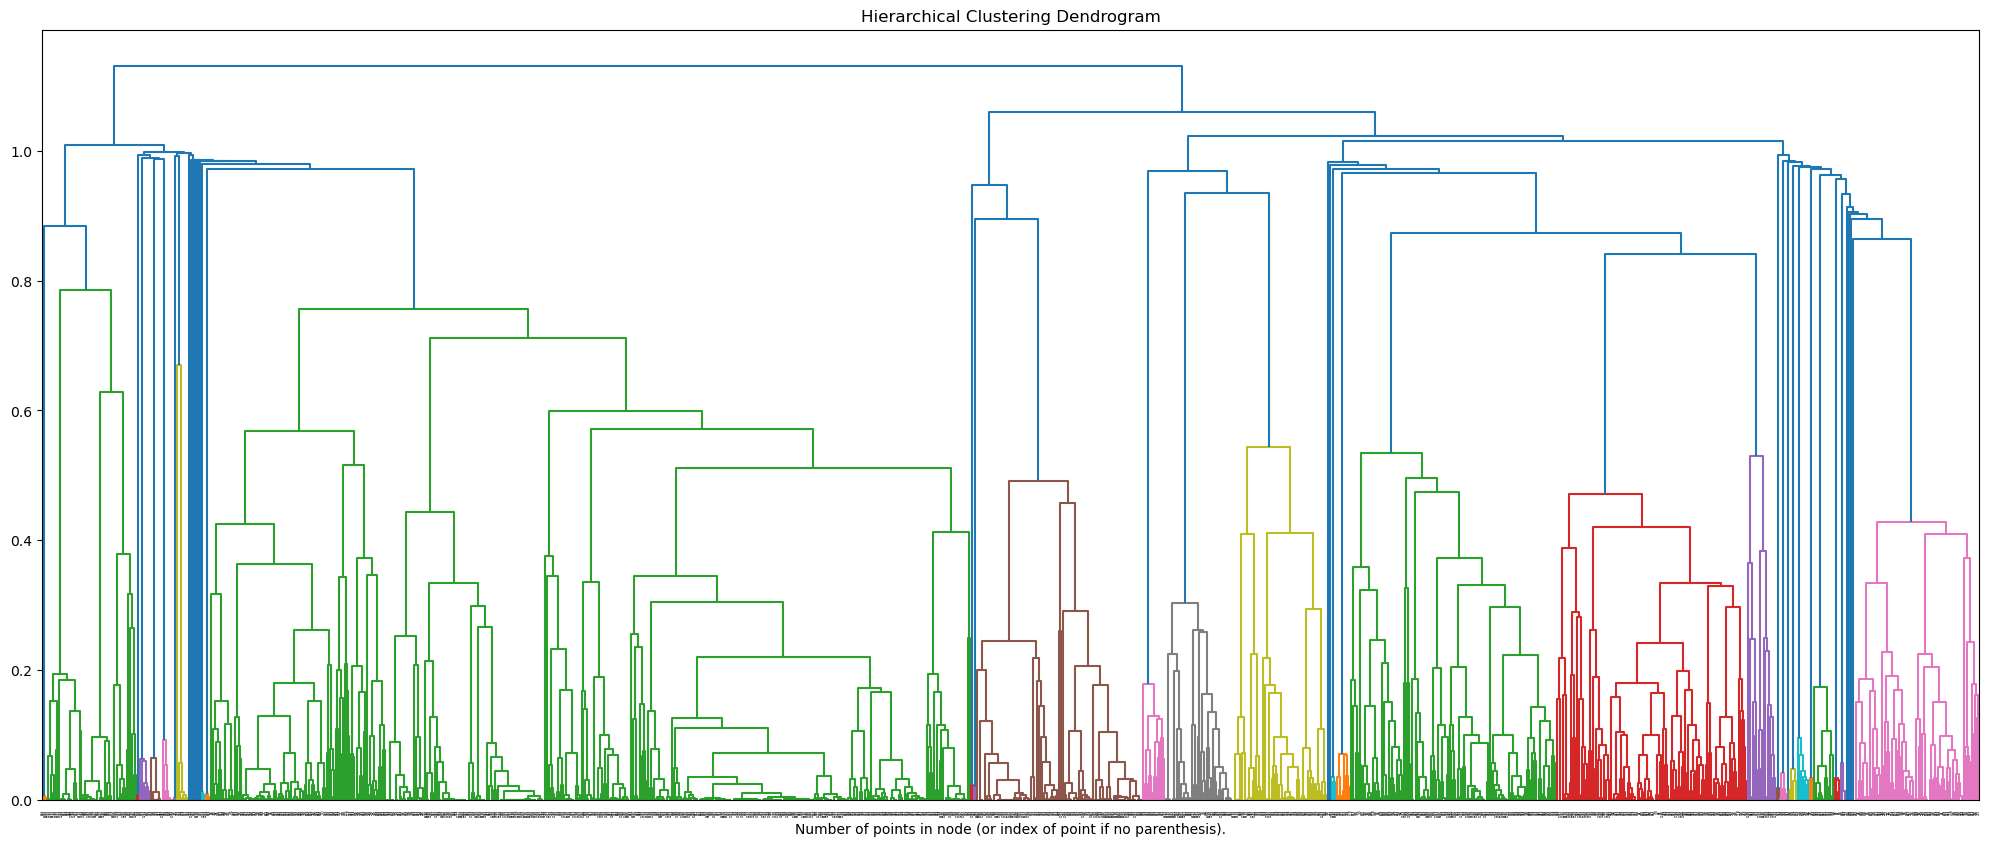

In [8]:
X_train = X # just for the graphs
def plot_dendrogram(model, **kwargs):
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(metric='cosine', linkage='average', distance_threshold=0, n_clusters=None)

model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.) # to cut the tree short -> , truncate_mode="level", p=4)
plt.xlabel("Number of points in node")
# plt.savefig('hierarchical_plots/final_dendrogram.png', dpi=300) #uncomment to save
plt.show()

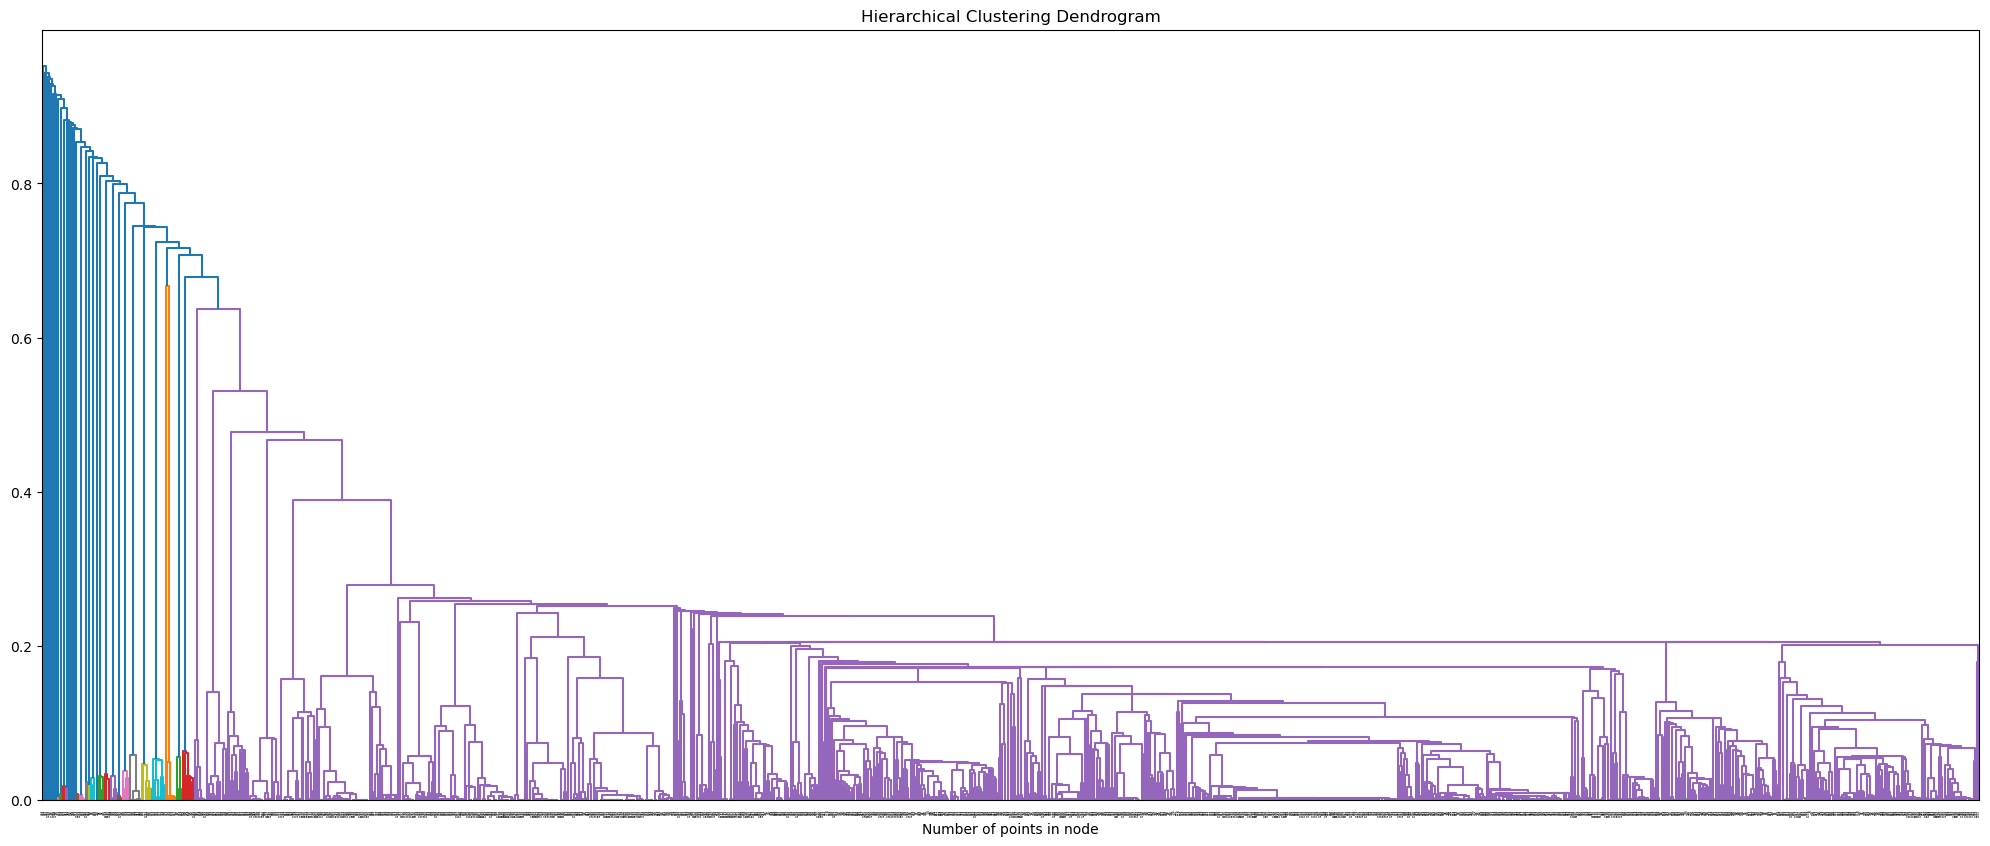

In [9]:
model = AgglomerativeClustering(metric='cosine', linkage='single', distance_threshold=0, n_clusters=None)
model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.)
plt.xlabel("Number of points in node")
plt.show()

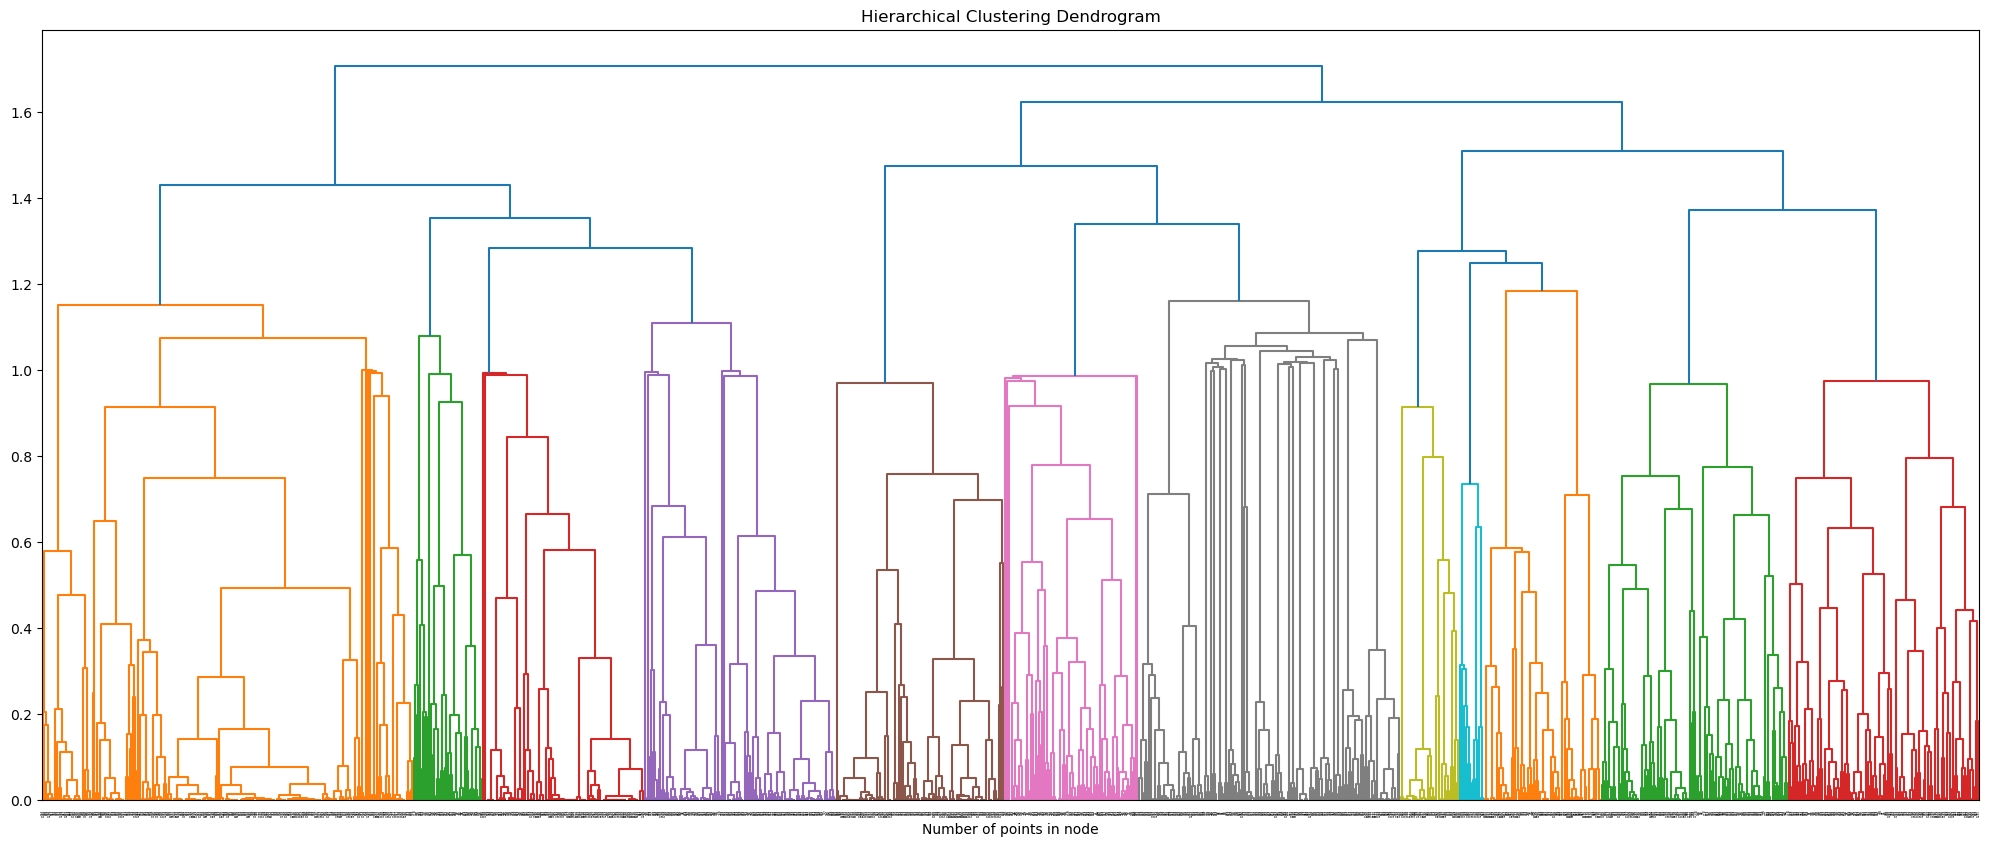

In [10]:
model = AgglomerativeClustering(metric='cosine', linkage='complete', distance_threshold=0, n_clusters=None)
model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.)
plt.xlabel("Number of points in node")
plt.show()

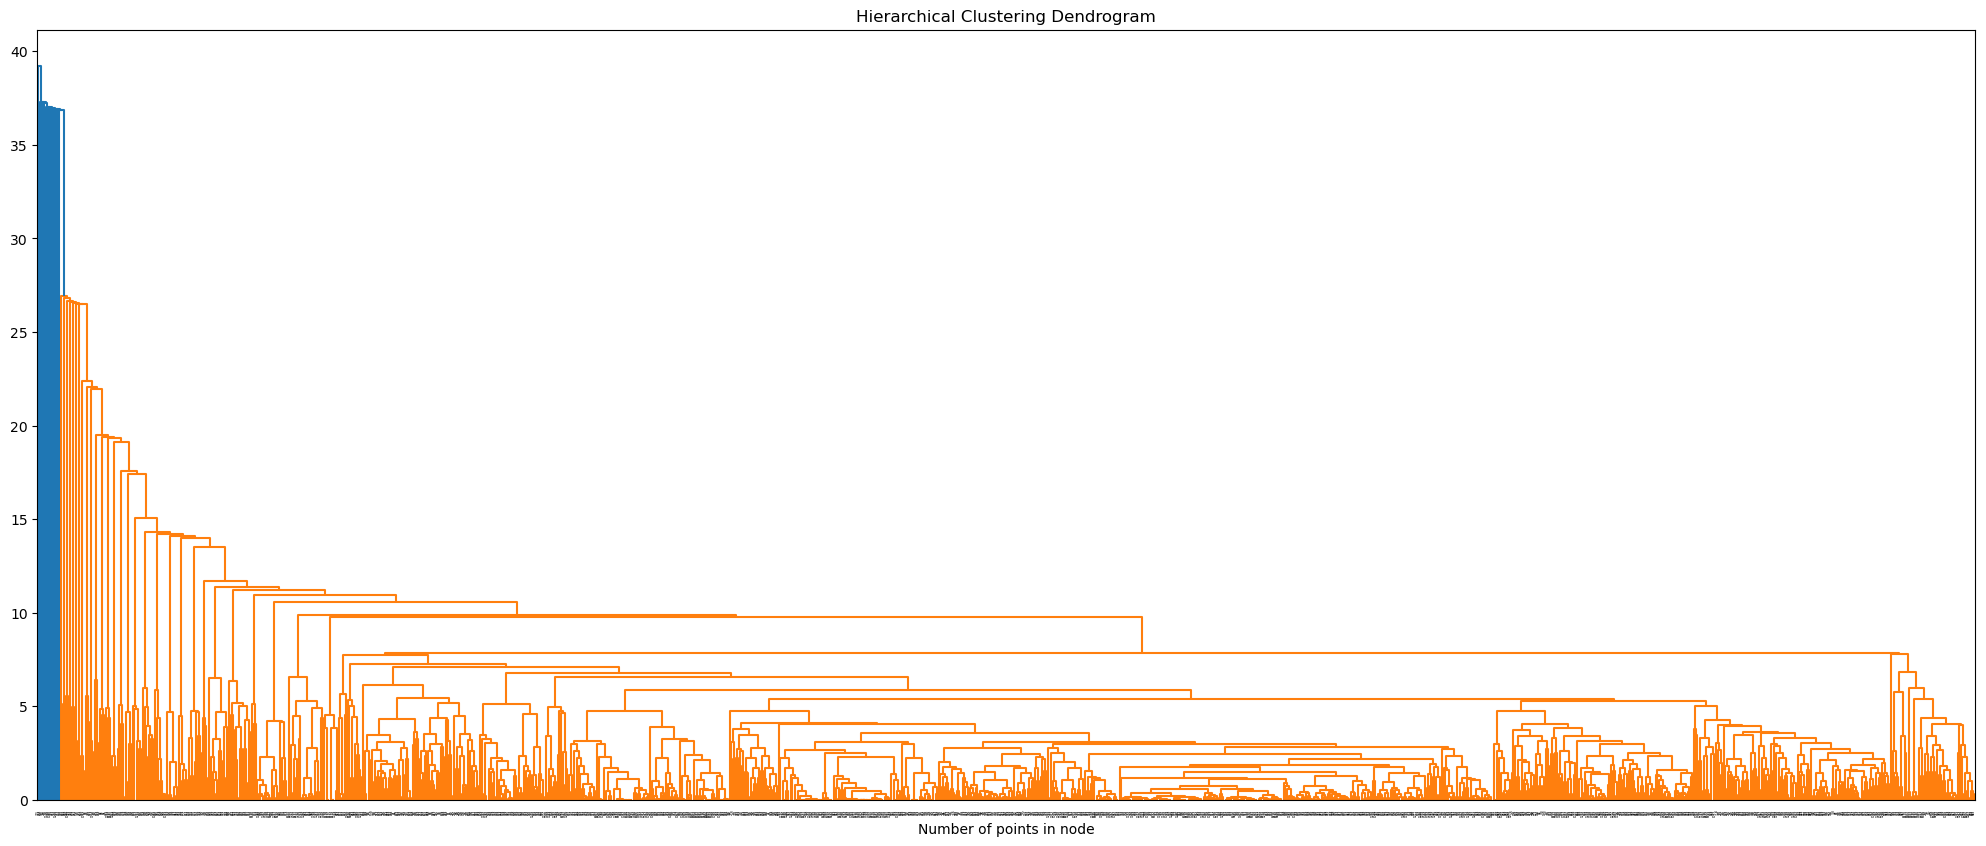

In [11]:
model = AgglomerativeClustering(metric='euclidean', linkage='average', distance_threshold=0, n_clusters=None)
model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.)
plt.xlabel("Number of points in node")
plt.show()

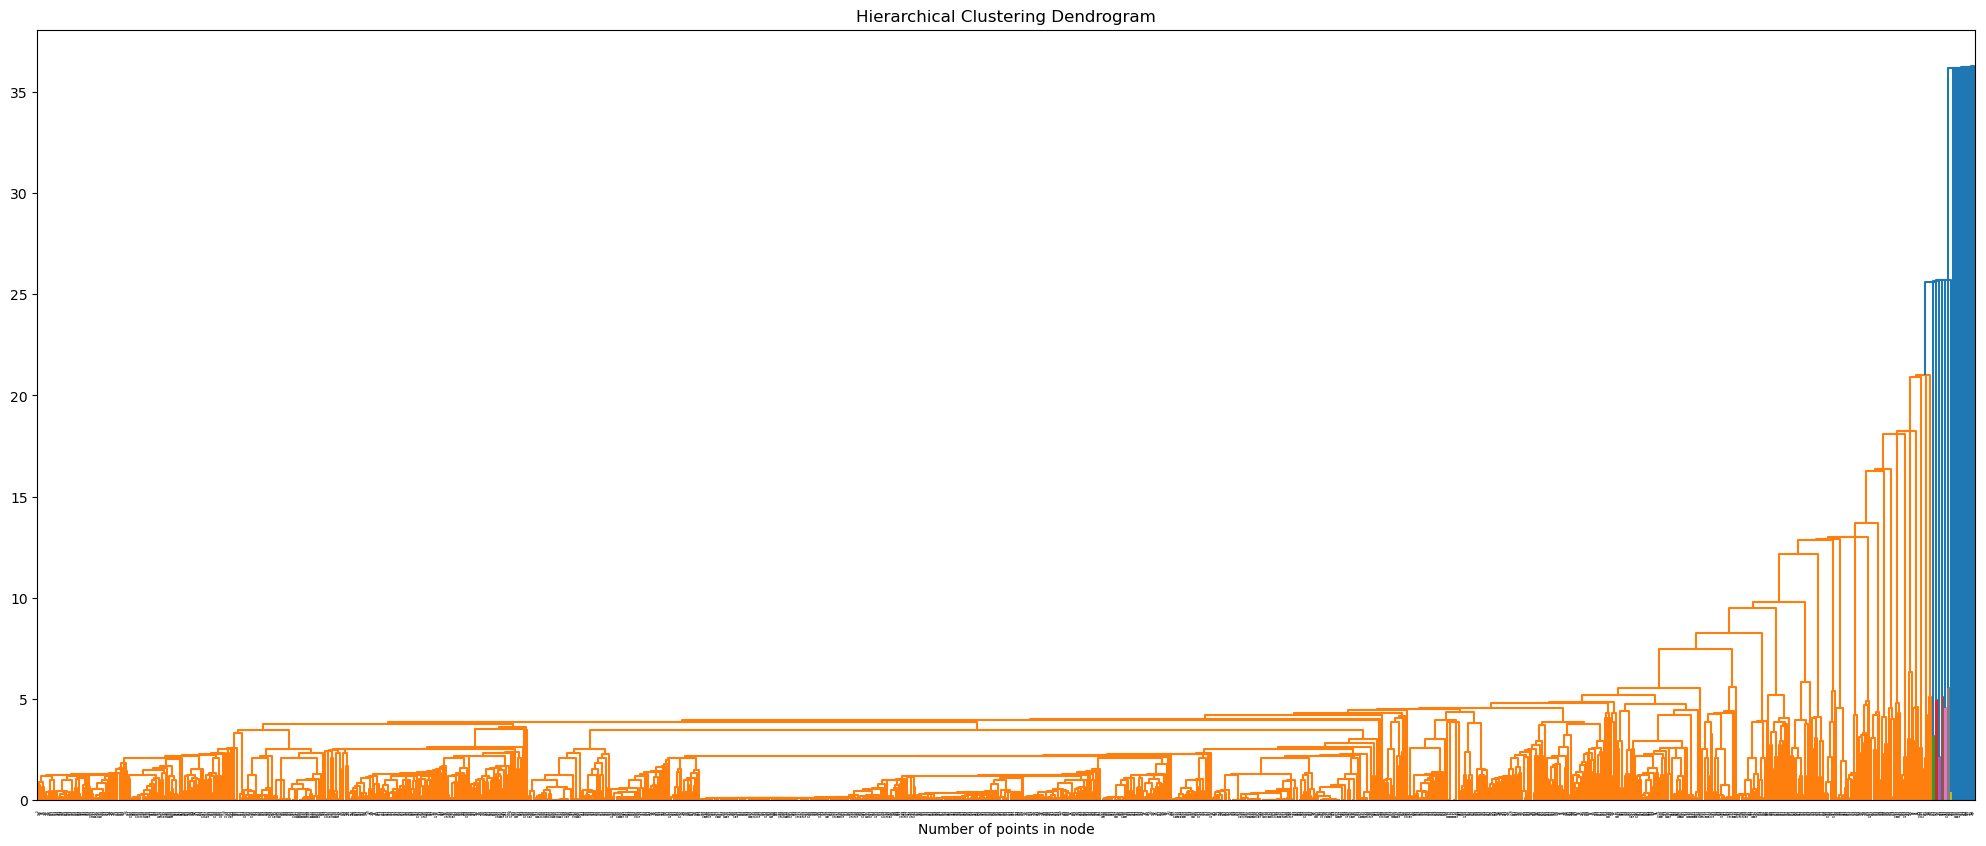

In [12]:
model = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=0, n_clusters=None)
model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.)
plt.xlabel("Number of points in node")
plt.show()

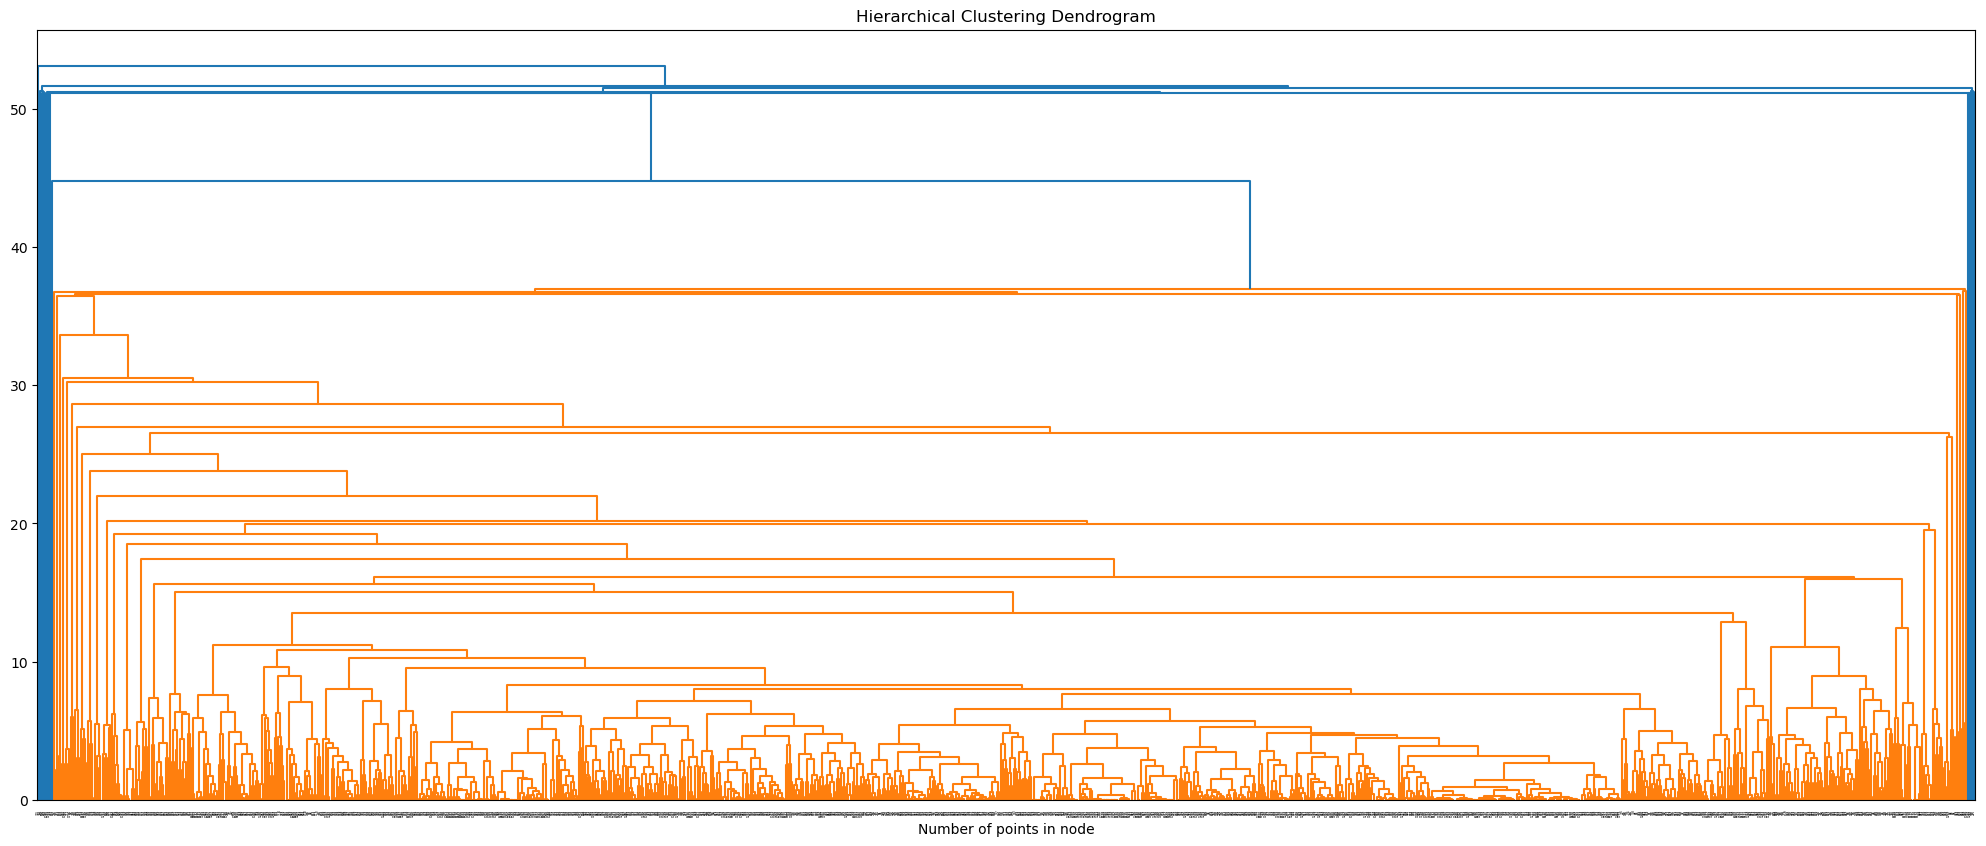

In [52]:
model = AgglomerativeClustering(metric='euclidean', linkage='complete', distance_threshold=0, n_clusters=None)
model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.)
plt.xlabel("Number of points in node")
plt.show()

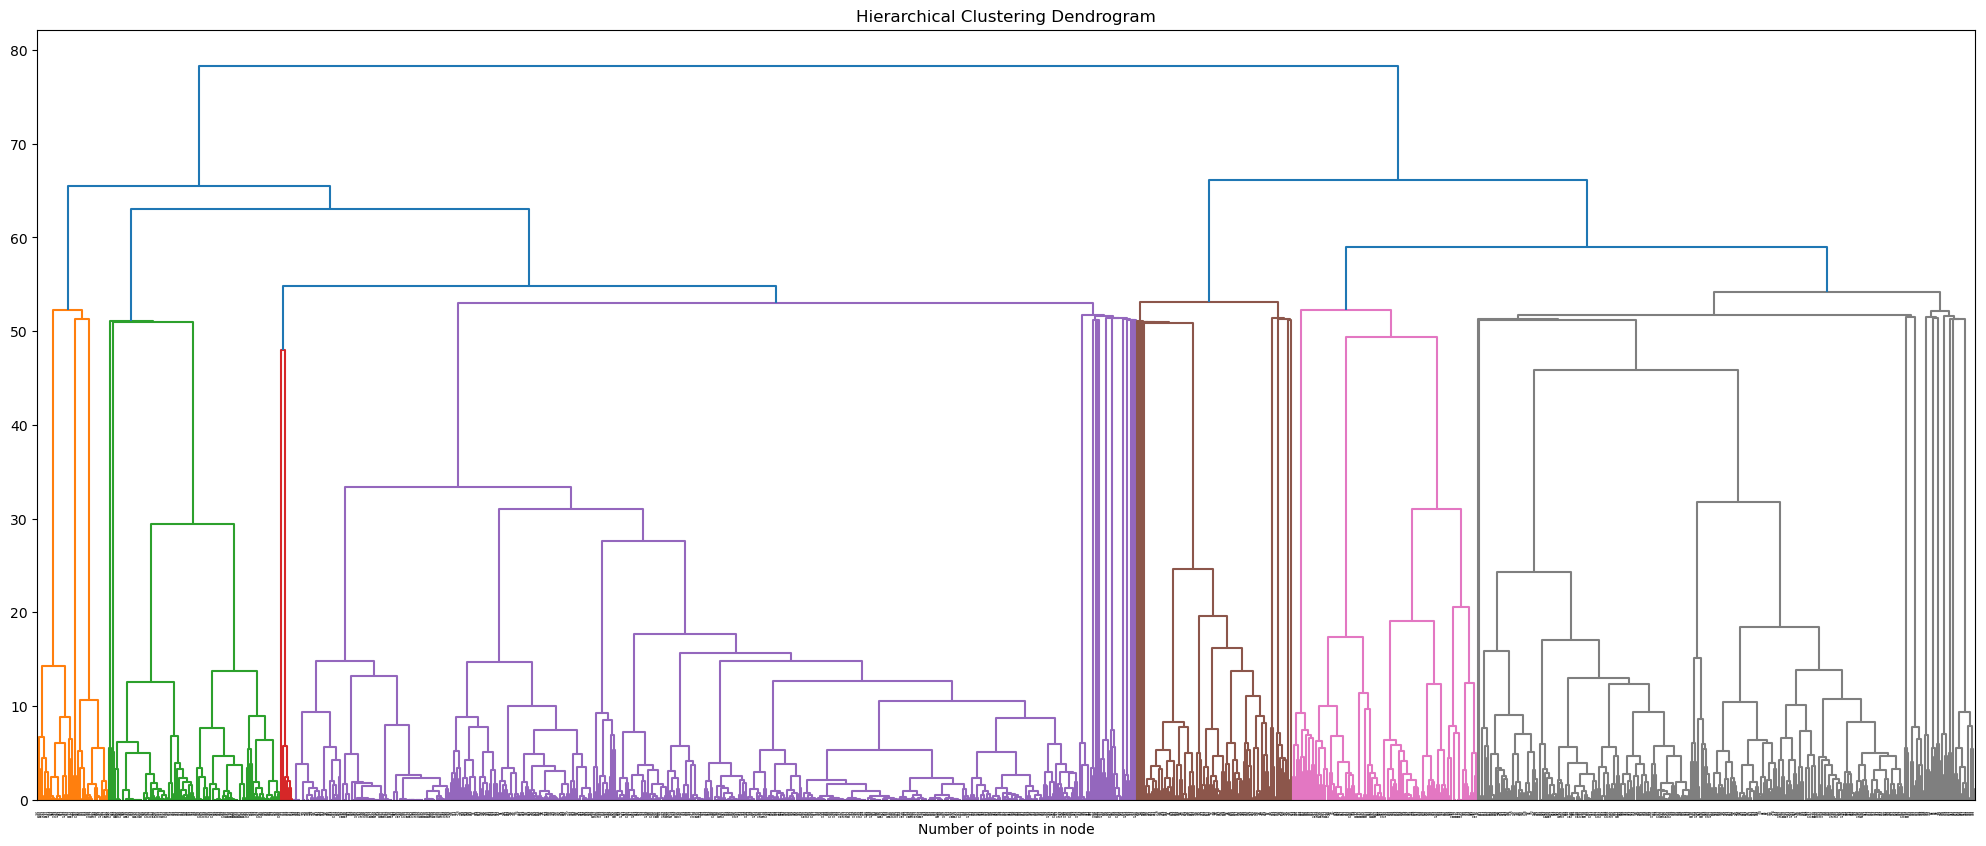

In [53]:
model = AgglomerativeClustering(metric='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
model = model.fit(X_train)
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, leaf_rotation=90., leaf_font_size=2.)
plt.xlabel("Number of points in node")
plt.show()